In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# loading the dataset

df = pd.read_csv('D:\Medical diagnosis AI\Datasets\Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
df.shape

(270, 14)

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

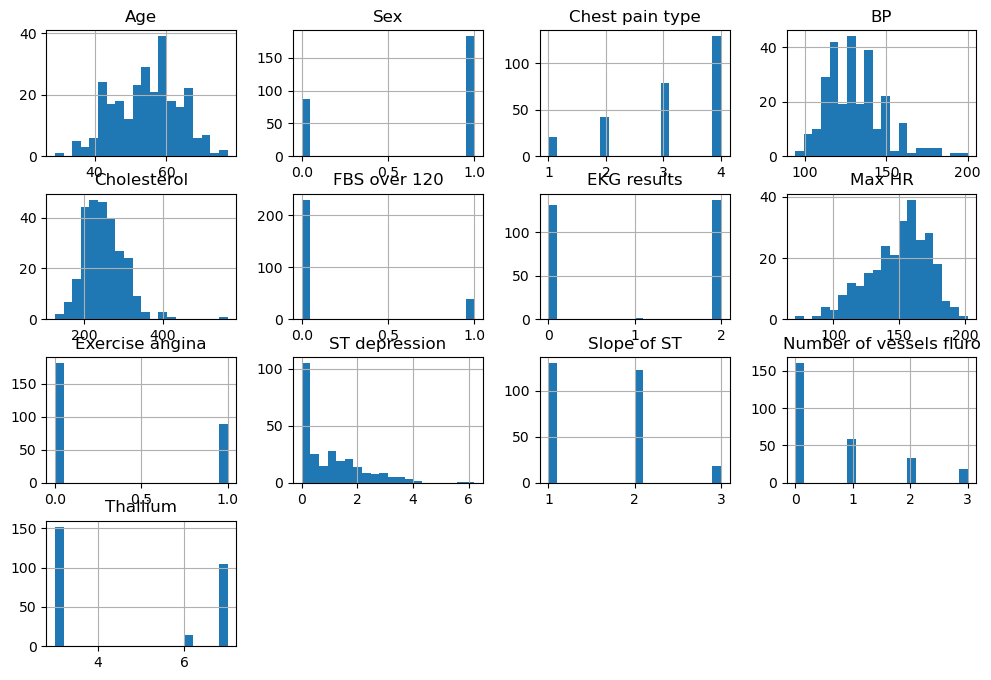

In [10]:
# Histograms
df.hist(figsize=(12, 8), bins=20)
plt.show()

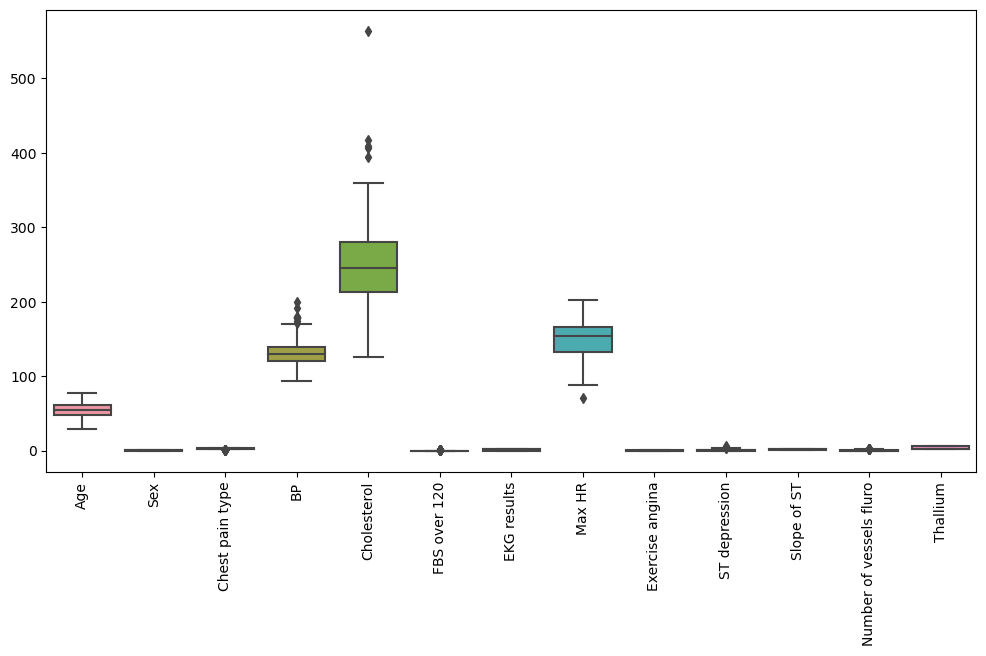

In [11]:
# Boxplots for outlier detection

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

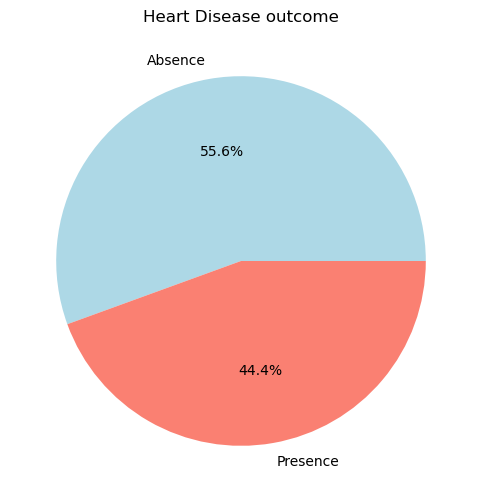

In [13]:
plt.figure(figsize=(6, 6))
df["Heart Disease"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"])
plt.title("Heart Disease outcome")
plt.ylabel("")  
plt.show()

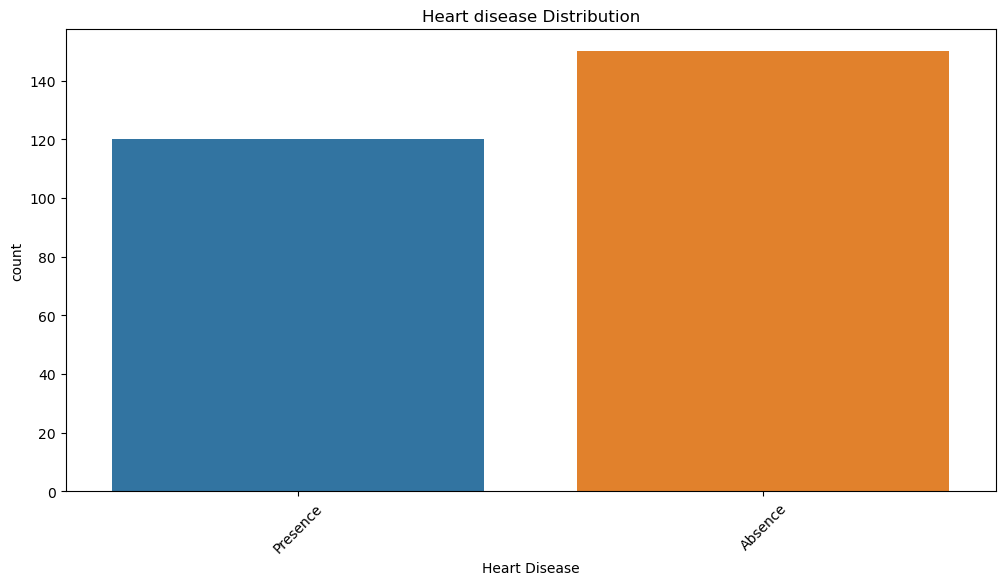

In [14]:
# count plot

plt.figure(figsize=(12, 6))
sns.countplot(x=df["Heart Disease"])  # Replace with any categorical column
plt.title("Heart disease Distribution")
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3824\2834913559.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


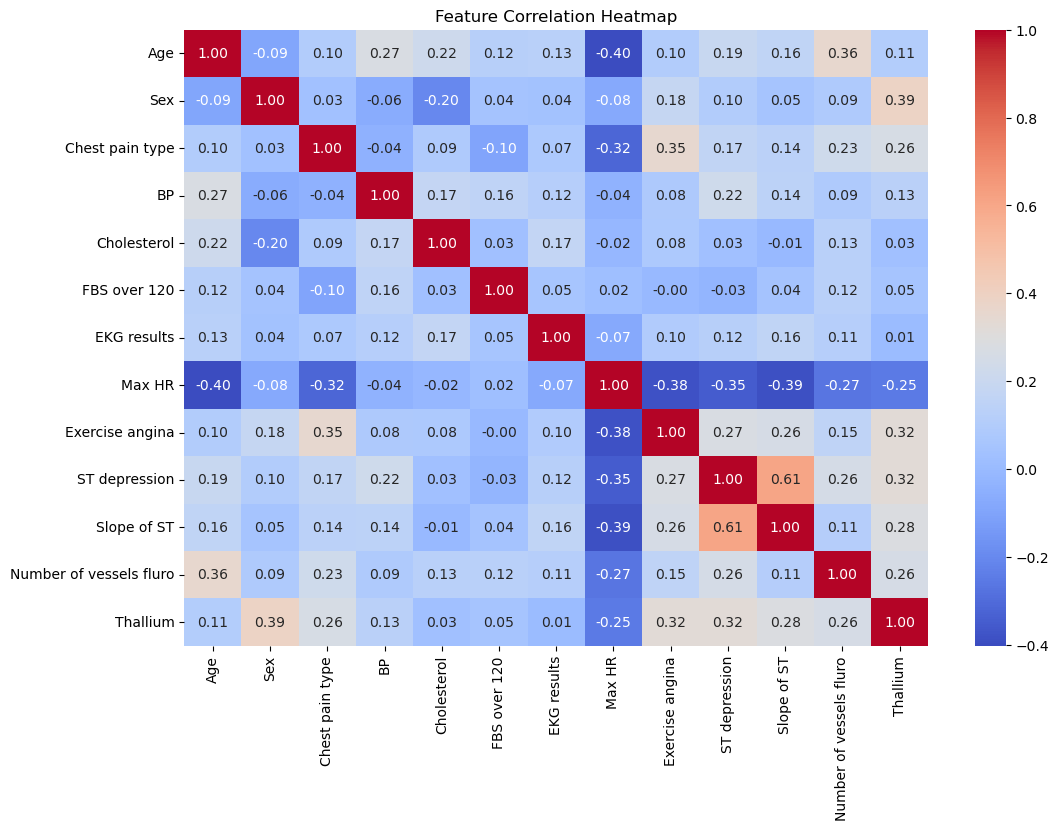

In [16]:
# correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
# label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["Heart Disease"])
df["Heart Disease"]=le.transform(df["Heart Disease"])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [20]:
# Define function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_dict = {}
    for col in df.select_dtypes(include=np.number).columns:  # Select only numerical columns
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
# Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = outliers.shape[0]  # Number of outliers

    return outlier_dict

In [21]:
outlier_counts = detect_outliers_iqr(df)
print(outlier_counts)  # Show number of outliers per column

{'Age': 0, 'Sex': 0, 'Chest pain type': 20, 'BP': 9, 'Cholesterol': 5, 'FBS over 120': 40, 'EKG results': 0, 'Max HR': 1, 'Exercise angina': 0, 'ST depression': 4, 'Slope of ST': 0, 'Number of vessels fluro': 19, 'Thallium': 0, 'Heart Disease': 0}


In [22]:
def impute_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = df[col].median()
        
        # Replace outliers with median
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])
    
    return df

df_cleaned = impute_outliers(df)

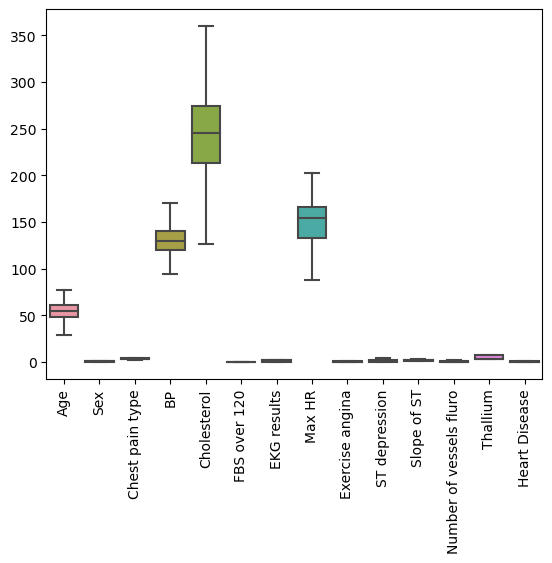

In [24]:
# boxplot after handling outliers

sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Splitting data

X = df.drop(columns=['Heart Disease'])  # Features
y = df['Heart Disease']  # Target variable

In [26]:
#standardisation
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(X)
pd.DataFrame(SS_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.712094,0.689500,0.931433,0.024742,1.734128,0.0,0.981664,-1.811761,-0.701222,1.375507,0.676419,-0.654228,-0.875706
1,1.382140,-1.450327,-0.442813,-0.967375,-0.024703,0.0,0.981664,0.442809,-0.701222,0.596714,0.676419,-0.654228,1.189277
2,0.282294,0.689500,-1.817059,-0.372105,0.340768,0.0,-1.026285,-0.397129,-0.701222,-0.668825,-0.954234,-0.654228,1.189277
3,1.052186,0.689500,0.931433,-0.107541,0.386452,0.0,-1.026285,-1.988590,1.426081,-0.766174,0.676419,0.770301,1.189277
4,2.152032,-1.450327,-1.817059,-0.636670,0.523504,0.0,0.981664,-1.281274,1.426081,-0.766174,-0.954234,0.770301,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.442813,0.024742,-1.075433,0.0,-1.026285,0.531224,-0.701222,-0.474126,-0.954234,-0.654228,1.189277
266,-1.147506,0.689500,-1.817059,-0.636670,0.386452,0.0,-1.026285,1.017504,-0.701222,-0.960872,-0.954234,-0.654228,1.189277
267,0.172309,-1.450327,-1.817059,0.686153,1.094553,0.0,0.981664,0.133359,-0.701222,0.304667,0.676419,-0.654228,-0.875706
268,0.282294,0.689500,0.931433,0.686153,-1.235327,0.0,-1.026285,-0.087678,-0.701222,-0.571476,0.676419,-0.654228,0.673032


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [39]:
#Metrics

ac1=accuracy_score(y_train,Y_pred_train)
print("Training accuracy score:",ac1.round(3))
ac2=accuracy_score(y_test,Y_pred_test)
print("Test accuracy score:",ac2.round(3))

Training accuracy score: 0.833
Test accuracy score: 0.852


In [42]:
# building a predictive system

input_data = (1.712094,0.689500,0.931433,0.024742,1.734128,0.0,0.981664,-1.811761,-0.701222,1.375507,0.676419,-0.654228,-0.875706)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#re sahpe the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the data
# std_data = scalar.transform(input_data_reshaped)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have Heart Disease")
    
else:
    print("The person has Heart Disease")

C:\ProgramData\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[1.]
The person has Heart Disease


In [43]:
# saving the model

import pickle

In [44]:
filename = 'Heart_Disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [46]:
# loading the saved model
loaded_model = pickle.load(open('Heart_Disease_model.sav', 'rb'))

In [47]:
for column in X_train.columns:
    print(column)

Age
Sex
Chest pain type
BP
Cholesterol
FBS over 120
EKG results
Max HR
Exercise angina
ST depression
Slope of ST
Number of vessels fluro
Thallium
